# **GET DRUNK IN THE FIRST YEAR OF COLLEGE?**
Dataset of first year student and question with their:

- **College entrance grades (3 subjects)**
- **Family background (family relationship status, parents' jobs and educational background)**
- **Student life in first year (drinking frequency, romantic relationships, studytime, go out etc.)**

We would like to analyze the data and predict if one was great at highschool and has good entrance exam grade becomes a drinker/drunker in the first year of college.

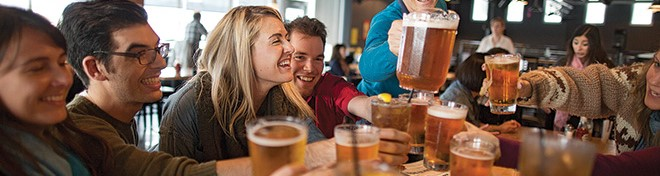

# <font color='red'>IMPORT DATA</font>

In [75]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [76]:
data=pd.read_csv("student-por.csv")

In [77]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [78]:
print("Number of Students:", data.shape[0])

Number of Students: 649


In [79]:
#insert a new column to display the total grades of entrance exam
data.insert(loc=0, column="total_grade", value=data["G1"]+data["G2"]+data["G3"], allow_duplicates=False)

# <font color='red'>LET'S HAVE A LOOK AT THE DATA</font>

In [81]:
def percentage_count(feature, data):
    counts = data.groupby(feature).school.count()
    counts = counts / data.shape[0] * 100
    return counts

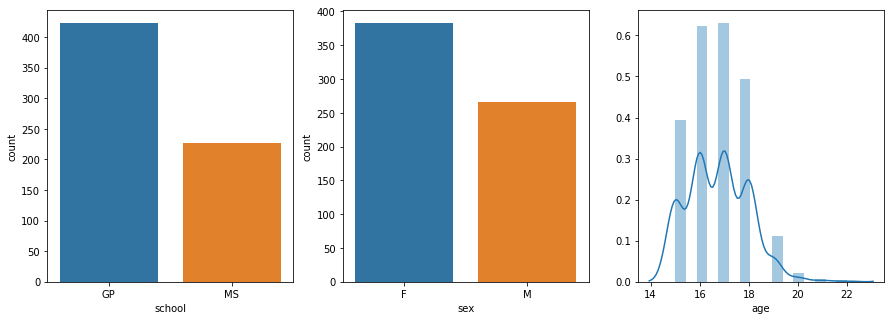

In [82]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3, 1)
sns.countplot(data["school"])
plt.subplot(1,3, 2)
sns.countplot(data["sex"])
plt.subplot(1,3, 3)
sns.distplot(data["age"])
plt.show()

Text(0.5,1,'Family relation quality')

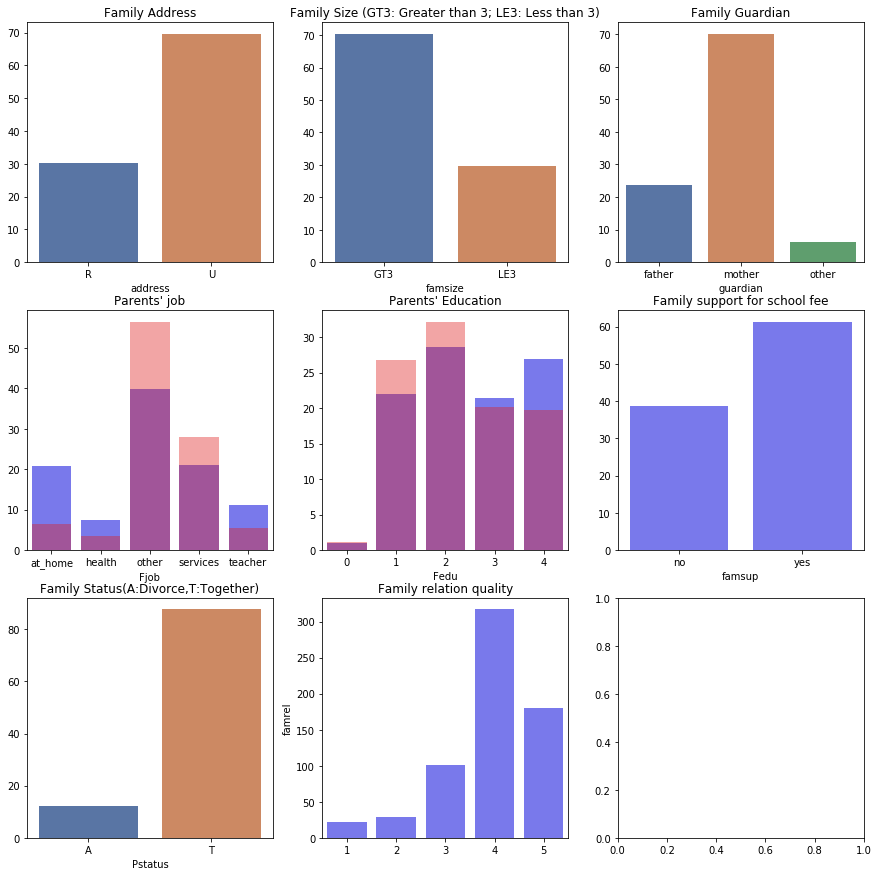

In [83]:
fig, ax = plt.subplots(3,3, figsize = (15,15))
sns.barplot(x=percentage_count("address",data).index, y=percentage_count("address",data).values, palette="deep",ax = ax[0,0])
ax[0,0].set_title("Family Address")
sns.barplot(x=percentage_count("famsize",data).index, y=percentage_count("famsize",data).values, palette="deep",ax=ax[0,1])
ax[0,1].set_title("Family Size (GT3: Greater than 3; LE3: Less than 3)")
sns.barplot(x=percentage_count("guardian",data).index, y=percentage_count("guardian",data).values, palette="deep",ax=ax[0,2])
ax[0,2].set_title("Family Guardian")
sns.barplot(x=percentage_count("Pstatus",data).index, y=percentage_count("Pstatus",data).values, palette="deep",ax=ax[2,0])
ax[2,0].set_title("Family Status(A:Divorce,T:Together)")
sns.barplot(x=percentage_count("Mjob",data).index, y=percentage_count("Mjob",data).values, color="blue",alpha=0.6,ax=ax[1,0])
sns.barplot(x=percentage_count("Fjob",data).index, y=percentage_count("Fjob",data).values, color="red",alpha=0.4,ax=ax[1,0])
ax[1,0].set_title("Parents' job")
sns.barplot(x=percentage_count("Medu",data).index, y=percentage_count("Medu",data).values, color="blue",alpha=0.6,ax=ax[1,1])
sns.barplot(x=percentage_count("Fedu",data).index, y=percentage_count("Fedu",data).values, color="red",alpha=0.4,ax=ax[1,1])
ax[1,1].set_title("Parents' Education")
sns.barplot(x=percentage_count("famsup",data).index, y=percentage_count("famsup",data).values, color="blue",alpha=0.6,ax=ax[1,2])
ax[1,2].set_title("Family support for school fee")
sns.barplot(y=data["famrel"].value_counts(), x=data["famrel"].value_counts().index, color="blue",alpha=0.6,ax=ax[2,1])
ax[2,1].set_title("Family relation quality")

Text(0.5,1,'Result of male and female students')

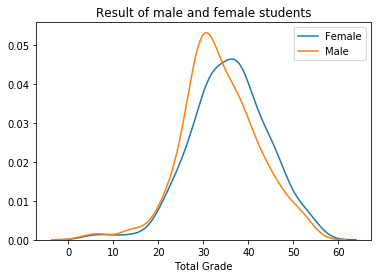

In [84]:
sns.distplot(data[data["sex"]=="F"]["total_grade"],hist=False, label='Female')
ax = sns.distplot(data[data["sex"]=="M"]["total_grade"],hist=False, label='Male')
ax.set_xlabel("Total Grade")
ax.set_title("Result of male and female students")

# Correlation

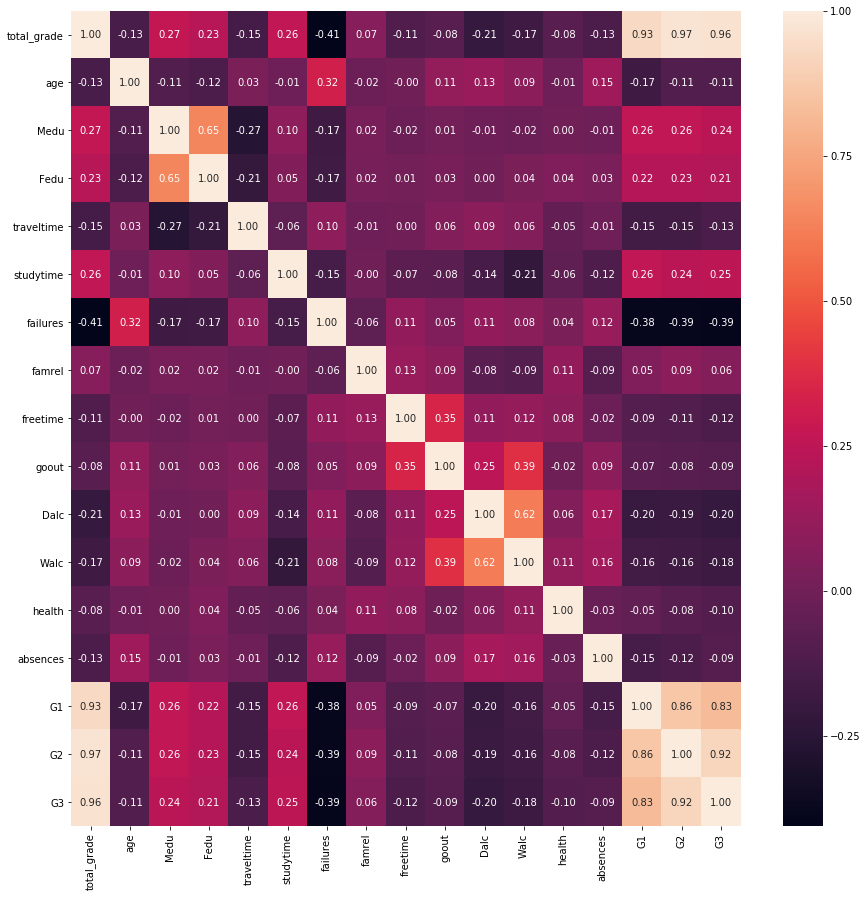

In [86]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)

**How does family affect student result?**

Text(0.5,1,"How does family relationship status affect student's results?")

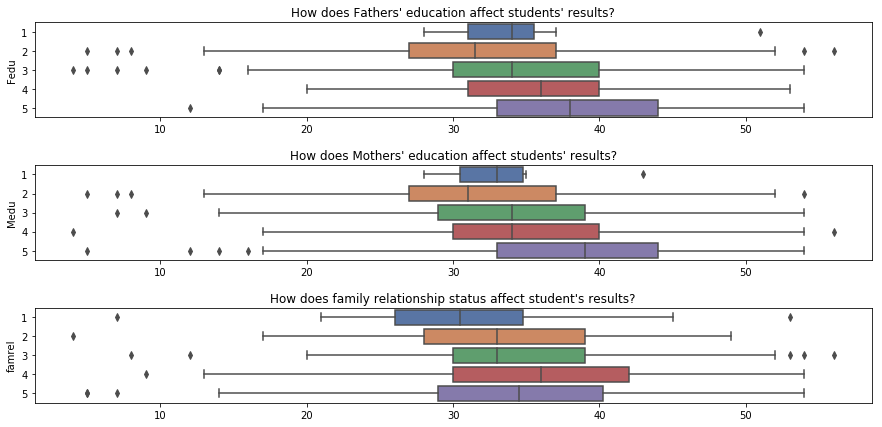

In [88]:
fig,ax = plt.subplots(nrows=3,ncols=1,sharey = "all", figsize =(15,7))
plt.subplots_adjust(hspace =0.5)
#I want to add Xlabel?
sns.boxplot(y="Fedu", x=data["G1"]+data["G2"]+data["G3"], data=data, orient="h", palette="deep",ax=ax[0])
ax[0].set_title("How does Fathers' education affect students' results?")
sns.boxplot(y="Medu", x=data["G1"]+data["G2"]+data["G3"], data=data, orient="h", palette="deep",ax=ax[1])
ax[1].set_title("How does Mothers' education affect students' results?")
sns.boxplot(y="famrel", x=data["G1"]+data["G2"]+data["G3"], data=data, orient="h", palette="deep")
ax[2].set_title("How does family relationship status affect student's results?")

# <font color='red'>DRINKING HABIT & PREDICTION</font>

Text(0.5,1,'How many times students drink in one week?')

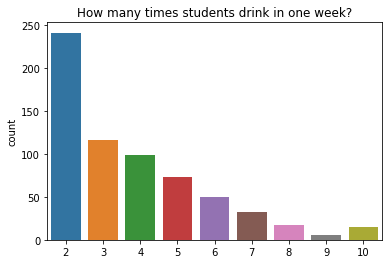

In [90]:
drink=data["Dalc"]+data["Walc"]
sns.countplot(drink).set_title("How many times students drink in one week?")

Text(0.5,1,'Weekend drinkers')

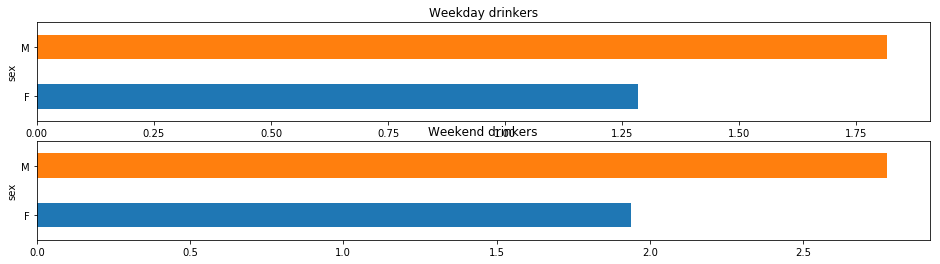

In [91]:
fix,ax=plt.subplots(2,1,figsize=(16,4))
ax1=data.groupby(["sex"])["Dalc"].mean()
ax1.plot(kind='barh',ax=ax[0]).set_title("Weekday drinkers")
ax2=data.groupby(["sex"])["Walc"].mean()
ax2.plot(kind='barh').set_title("Weekend drinkers")

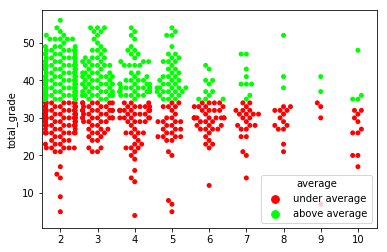

In [92]:
ave = sum(data.total_grade)/float(len(data))
data['average'] = ['above average' if i > ave else 'under average' for i in data.total_grade]
sns.swarmplot(x=data['Dalc']+data["Walc"], y ="total_grade", hue = 'average',data= data,palette={'above average':'lime', 'under average': 'red'})
plt.savefig("thuan.png")

Everyone has at least 2 times drink in one week. We should devide the frequency of drinking in to 3 group: Acceptable (<5 times/week); A little too much (>=5 and <8 times per week) and Tooo much (>=8 and <10 times per week). Name the  groups 0, 1, 2 accordingly.

In [93]:
drink=data["Dalc"]+data["Walc"]
drink.unique()
def group_student(n):
    if n < 5:
        return 0
    elif n < 8:
        return 1
    else:
        return 2
y = drink.apply(group_student)
y.unique()

array([0, 1, 2], dtype=int64)

# Predict if a student becomes a drinker/drunker in college

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [95]:

data=pd.get_dummies(data, columns=['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 
                                   "romantic",  'schoolsup', 'famsup', 'paid', 'activities','nursery', 'higher', 'internet'], drop_first=True)

In [96]:
X=data.drop(["Dalc","Walc", "school", "reason", "total_grade", "average"], axis=1)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [99]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
predictions = model.predict(X_test)

0.7307692307692307
             precision    recall  f1-score   support

          0       0.82      0.91      0.86        97
          1       0.37      0.25      0.30        28
          2       0.00      0.00      0.00         5

avg / total       0.69      0.73      0.71       130



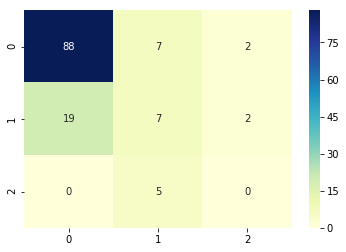

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='YlGnBu')

0.7692307692307693
             precision    recall  f1-score   support

          0       0.82      0.95      0.88        97
          1       0.47      0.29      0.36        28
          2       0.00      0.00      0.00         5

avg / total       0.71      0.77      0.73       130



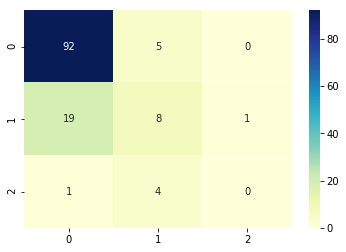

In [102]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=25)

model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)

print(accuracy_score(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))
sns.heatmap(confusion_matrix(y_test, predictions_rf), annot=True, cmap='YlGnBu')

# <font color='red'>FINAL WORDS</font>
The two models gave quite precise prediction on students who are a bit drunk in the first year college while the students who are too drunk are unpredictable!
Let's try next time to multiple the group of drinkers to have better result. 
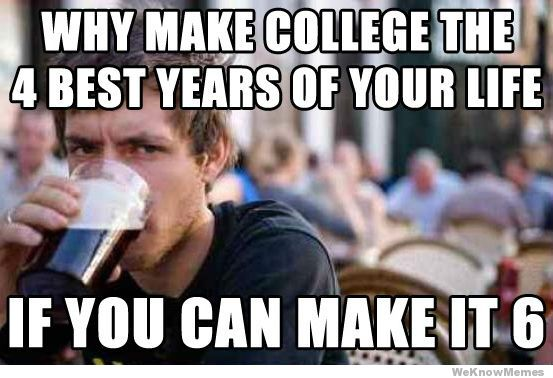